conda install -c anaconda seaborn=0.7.1

In [167]:
import pandas as pd
import thinkstats2 as ts2
import thinkplot as tp
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import math
import seaborn as sns
%matplotlib inline

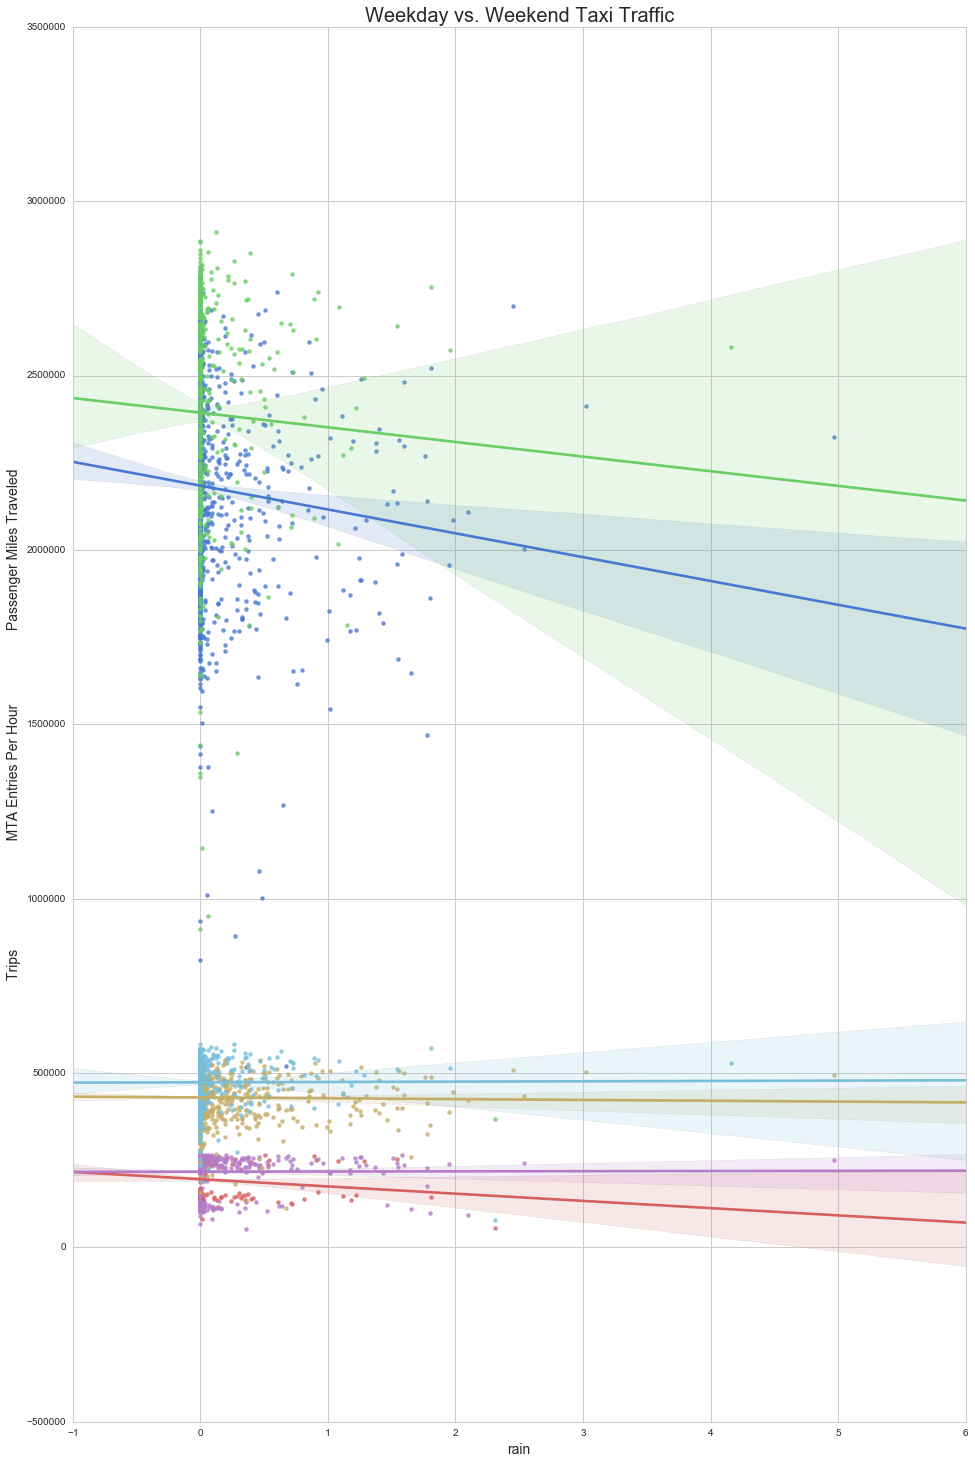

In [168]:
weekends = df[df.weekday>5]
weekdays = df[df.weekday<6]
sns.set_style("whitegrid")
sns.set_palette("muted")
plt.figure(figsize=(16,25))
plt.title("Weekday vs. Weekend Taxi Traffic", fontsize=20)
sns.regplot(weekdays.rain, weekdays.pmt,  ci=90)
sns.regplot(weekends.rain, weekends.pmt,  ci=90)
sns.regplot(weekends.rain, weekends.mta, ci=90)
sns.regplot(weekdays.rain, weekdays.mta, ci=90)
sns.regplot(weekdays.rain, weekdays.trips,  ci=90)
sns.regplot(weekends.rain, weekends.trips,  ci=90)
plt.xlabel("rain", fontsize=14)
plt.ylabel("Trips                            MTA Entries Per Hour                   Passenger Miles Traveled", fontsize=14)
plt.show()


In [169]:
df = pd.read_csv("precipitation_data.csv")
taxi = pd.read_csv("output.csv")
mta = pd.read_csv("entries_per_hour.csv")
df["date"] = pd.to_datetime(df.date, infer_datetime_format=True)
taxi["date"] = pd.to_datetime(taxi.date, infer_datetime_format=True)
mta["date"] = pd.to_datetime(mta.date, infer_datetime_format=True)

In [170]:
dataframe = df.merge(right=taxi, left_on="date", right_on="date", how='left')

In [171]:
dataframe = dataframe.merge(right=mta, left_on="date", right_on="date", how='left')

In [172]:
dataframe.to_csv("dataframe.csv", index=False)

In [213]:
dataframe = pd.read_csv("dataframe.csv")
dataframe.head()

,date,rain,snowdepth,snow,weekday,weekend,holidays,trips,pmt,entries_per_hour
0,2012-01-01,0.05,0.0,0.0,1,0,1,204292.0,1011660.0,NaN
1,2012-01-02,0.00,0.0,0.0,2,0,1,333247.0,1914804.0,NaN
2,2012-01-03,0.00,0.0,0.0,3,0,0,427620.0,2084644.0,NaN
3,2012-01-04,0.00,0.0,0.0,4,0,0,462170.0,2122041.0,NaN
4,2012-01-05,0.00,0.0,0.0,5,0,0,477173.0,2189748.0,NaN


In [214]:
dataframe.columns = ['date', 'rain', 'snowdepth', 'snow', 'weekday', 'weekend', 'holidays', 'trips', 'pmt', 'entries']

In [215]:
df = dataframe[dataframe.pmt>0]

In [229]:
df["date"]=pd.to_datetime(df.date, infer_datetime_format=True)

C:\Users\J.X\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [271]:
weekends = df[df.weekend==1]
weekdays = df[df.weekend==0]
saturdays = df[df.weekday==6]
sundays = df[df.weekday==7]

In [232]:
import pandas as pd

from bokeh.charts import TimeSeries, show

data = dict(date=df.date, weekend=df.weekend, pmt=df.pmt, trips=df.trips)

tsplot = TimeSeries(data,
    x='date', y=['pmt', 'trips'],
    color=['blue','green'],
    title="Timeseries of PMT and Trips", marker='weekend',
    ylabel='Values', builder_type= "line", legend=True, plot_width=1200)

show(tsplot)

In [233]:
class CorrelationPermuate(ts2.HypothesisTest):
    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(ts2.Corr(xs, ys))
        return test_stat
    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

class CovariancePermutate(ts2.HypothesisTest):    
    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(ts2.Cov(xs, ys))
        return test_stat
    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    
class DiffMeansPermutate(ts2.HypothesisTest):
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [234]:
from bokeh.charts import Histogram, show

hist = Histogram(weekdays, values='pmt', title="Weekday Passenger Miles Traveled", color='purple', bins=25, plot_width=1200)

show(hist)

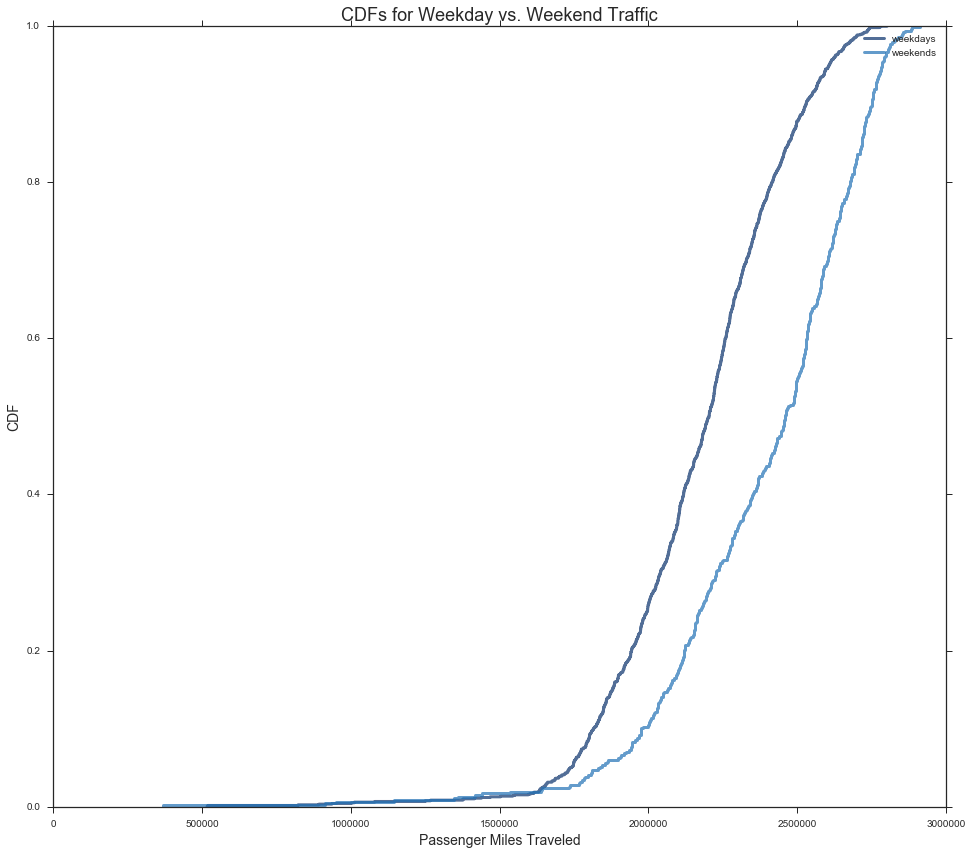

In [235]:
weekday_pmt_cdf = ts2.Cdf(weekdays.pmt, label='weekdays')
weekend_pmt_cdf = ts2.Cdf(weekends.pmt, label='weekends')

plt.figure(figsize=(16,14))
plt.title("CDFs for Weekday vs. Weekend Traffic", fontsize=18)
plt.xlabel("Passenger Miles Traveled", fontsize=14)
plt.ylabel("CDF", fontsize=14)
tp.PrePlot(2)
tp.Cdfs([weekday_pmt_cdf, weekend_pmt_cdf])
tp.Show()

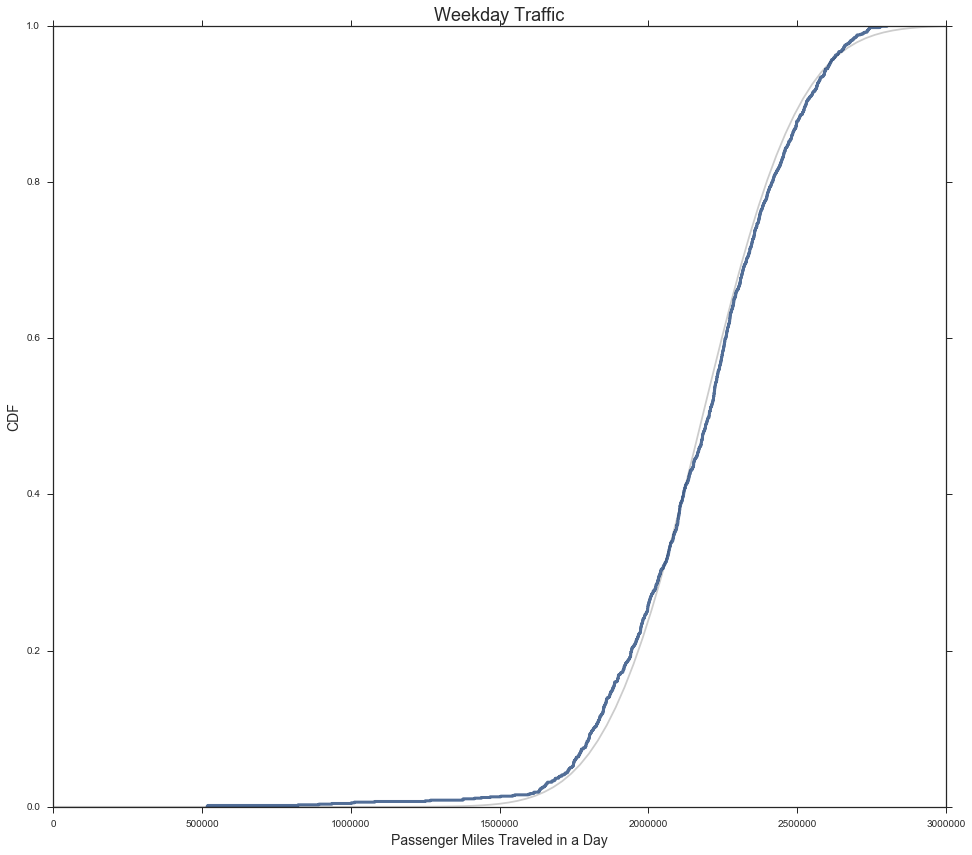

In [236]:
data = weekdays.pmt
mu, var = ts2.TrimmedMeanVar(data, p=0.01)

# plot the model
sigma = math.sqrt(var)
xs, ps = ts2.RenderNormalCdf(mu, sigma, low=0, high=3000000)
cdf = ts2.Cdf(data)

plt.figure(figsize=(16,14))
plt.plot(xs, ps, color='0.8')
#parameters for the resulting graph:
plt.title("Weekday Traffic", fontsize=18)
plt.xlabel("Passenger Miles Traveled in a Day", fontsize=14)
plt.ylabel("CDF", fontsize=14)
# plot the data
tp.Cdf(cdf)
plt.show()

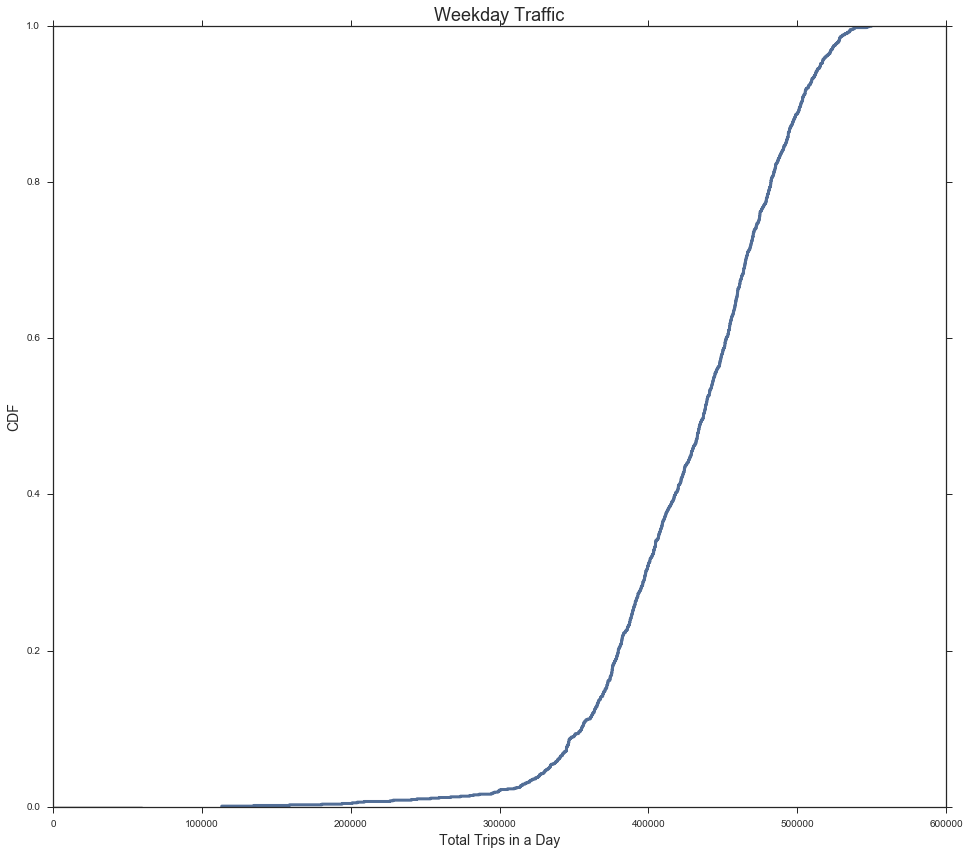

In [237]:
data = weekdays.trips
mu, var = ts2.TrimmedMeanVar(data, p=0.01)

# plot the model
sigma = math.sqrt(var)
xs, ps = ts2.RenderNormalCdf(mu, sigma, low=0, high=60000)
cdf = ts2.Cdf(data)

plt.figure(figsize=(16,14))
plt.plot(xs, ps, color='0.8')
#parameters for the resulting graph:
plt.title("Weekday Traffic", fontsize=18)
plt.xlabel("Total Trips in a Day", fontsize=14)
plt.ylabel("CDF", fontsize=14)
# plot the data
tp.Cdf(cdf)
plt.show()

## Feature Selection: 
### I've transformed the data to include the number of passenger miles traveled per day i.e. (Σ(number of passengers per trip*length of trip)) as well as a simple count of trips per day. It would be useful to understand how similar are the two metrics.

### Checking the Pearson's Correlation between PMT and trips

In [238]:
pmt_frame = df[df.pmt>0]
data = pmt_frame.pmt, pmt_frame.trips
ht = CorrelationPermuate(data)
pvalue = ht.PValue()
correlation = ts2.Corr(pmt_frame.pmt, pmt_frame.trips)
print(correlation)
print(pvalue)

0.886641963833
0.0


### It may be that without normalizing the values, we miss some relationship.

In [239]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
scaled_trips = min_max_scaler.fit_transform(df.trips)
scaled_pmt = min_max_scaler.fit_transform(df.pmt)

C:\Users\J.X\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\J.X\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\J.X\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature o

In [240]:
from bokeh.charts import TimeSeries, show

data = dict(trips=scaled_trips, pmt=scaled_pmt, date=df.date)

tsline = TimeSeries(data,
    x='date', y=['trips','pmt'],
    color=['blue', 'green'],
    title="PMT vs Trips", ylabel='Passenger Miles Traveled', legend=True, plot_width=1000)

show(column(tsline))

### Checking the Pearson's Correlation on Normalized Values Gives Exactly the Same Answer.

In [241]:
data = scaled_pmt, scaled_trips
ht = CorrelationPermuate(data)
pvalue = ht.PValue()
correlation = ts2.Corr(scaled_pmt, scaled_trips)
print(correlation)
print(pvalue)

0.886641963833
0.0


## Plot the time series for weekend and weekday traffic along with the means

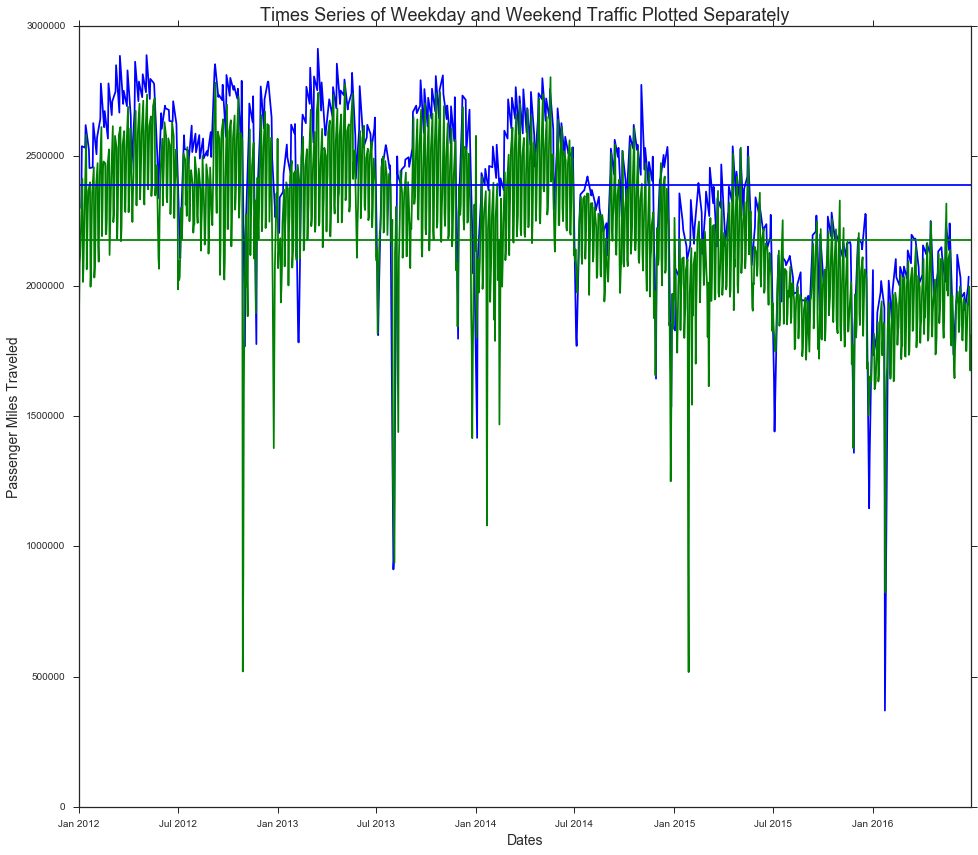

In [242]:
fig = plt.figure(figsize=(16,14))
plt.plot_date(weekends.date, weekends.pmt, 'b-')
plt.plot_date(weekdays.date, weekdays.pmt, 'g-')
plt.axhline(y=weekends.pmt.mean(), color='blue', linestyle='-')
plt.axhline(y=weekdays.pmt.mean(), color='green', linestyle='-')
plt.title("Times Series of Weekday and Weekend Traffic Plotted Separately", fontsize=18)
plt.xlabel("Dates", fontsize=14)
plt.ylabel("Passenger Miles Traveled", fontsize=14)
plt.show()

fig.autofmt_xdate()

In [273]:
from bokeh.charts import Histogram, show

hist = Histogram(df, values='pmt', label='weekday', color='weekday', legend='bottom_left', bins=50,
                  title="Histograms for day of the week", plot_width=1000)

show(hist)

# Hypothesis
## There is a statistically significant difference between the sample of entries from weekday and weekend traffic.
### Step 1: Check whether the difference between the means of the samples is statistically signficant.
### Check both metrics: pmt and trips
### Null Hypothesis: The factors affecting both samples are the same; treating them as one sample should not result in different means.

In [274]:
weekends = df[df.weekend==1]
weekdays = df[df.weekend==0]
saturdays = df[df.weekday==6]
sundays = df[df.weekday==7]

In [275]:
data = weekends.pmt, weekdays.pmt
ht = DiffMeansPermutate(data)
pvalue = ht.PValue()
difference_in_means = abs(weekends.pmt.mean()-weekdays.pmt.mean())
print(difference_in_means)
print(pvalue)

213009.42817966873
0.0


In [276]:
data = weekends.trips, weekdays.trips
ht = DiffMeansPermutate(data)
pvalue = ht.PValue()
difference_in_means = weekdays.trips.mean()-weekends.trips.mean()
print(difference_in_means)
print(pvalue)

-43750.96880705585
0.0


In [277]:
weekday_length = weekdays.pmt.mean()/weekdays.trips.mean()
weekend_length = weekends.pmt.mean()/weekends.trips.mean()
print(weekday_length)
print(weekend_length)

5.062595721348933
5.044679417691784


### Let's split weekend traffic again into Saturdays and Sundays to see how different the means of the two samples are.

In [268]:
data = saturdays.pmt, sundays.pmt
ht = DiffMeansPermutate(data)
pvalue = ht.PValue()
difference_in_means = abs(saturdays.pmt.mean()-sundays.pmt.mean())
print(difference_in_means)
print(pvalue)

56986.30769230751
0.074


In [267]:
data = saturdays.trips, sundays.trips
ht = DiffMeansPermutate(data)
pvalue = ht.PValue()
difference_in_means = abs(saturdays.trips.mean()-sundays.pmt.mean())
print(difference_in_means)
print(pvalue)

1944734.6965811965
0.782


# Hypothesis
## There is a statistically significant correlation or covariance between the amount of rain and yellow taxi traffic.

### Checking the Pearson's correlation between rainfall and weekend taxi traffic.

In [249]:
weekend_pmt = weekends.dropna(subset=['rain', 'pmt'])
data = weekend_pmt.rain, weekend_pmt.pmt
ht = CorrelationPermuate(data)
pvalue = ht.PValue()
correlation = abs(ts2.Corr(weekend_pmt.rain, weekend_pmt.pmt))
print(correlation)
print(pvalue)

0.0419566169949
0.348


In [279]:
weekend_trips = weekends.dropna(subset=['rain', 'trips'])
data = weekend_trips.rain, weekend_trips.trips
ht = CorrelationPermuate(data)
pvalue = ht.PValue()
correlation = abs(ts2.Corr(weekend_pmt.rain, weekend_pmt.trips))
print(correlation)
print(pvalue)

0.00457505504644
0.627


### What if we check the correlation separately for Saturdays and Sundays?

### Saturdays:

In [283]:
data = saturdays.rain, saturdays.pmt
ht = CorrelationPermuate(data)
pvalue = ht.PValue()
correlation = abs(ts2.Corr(saturdays.rain, saturdays.pmt))
print(correlation)
print(pvalue)

0.067523299609
0.285


In [284]:
data = saturdays.rain, saturdays.trips
ht = CorrelationPermuate(data)
pvalue = ht.PValue()
correlation = abs(ts2.Corr(saturdays.rain, saturdays.trips))
print(correlation)
print(pvalue)

0.100764719794
0.123


### Sundays:

In [285]:
data = sundays.rain, sundays.pmt
ht = CorrelationPermuate(data)
pvalue = ht.PValue()
correlation = abs(ts2.Corr(sundays.rain, sundays.pmt))
print(correlation)
print(pvalue)

0.175939782859
0.014


In [286]:
data = sundays.rain, sundays.trips
ht = CorrelationPermuate(data)
pvalue = ht.PValue()
correlation = abs(ts2.Corr(sundays.rain, sundays.trips))
print(correlation)
print(pvalue)

0.116794180586
0.064


### Checking the Pearson's correlation between rainfall and weekday traffic.

In [251]:
weekday_pmt = weekdays.dropna(subset=['rain', 'pmt'])
data = weekday_pmt.rain, weekday_pmt.pmt
ht = CorrelationPermuate(data)
pvalue = ht.PValue()
correlation = abs(ts2.Corr(weekday_pmt.rain, weekday_pmt.pmt))
print(correlation)
print(pvalue)

0.0848779145667
0.003


In [252]:
weekday_trips = weekdays.dropna(subset=['rain', 'trips'])
data = weekday_trips.rain, weekday_trips.trips
ht = CorrelationPermuate(data)
pvalue = ht.PValue()
correlation = abs(ts2.Corr(weekday_trips.rain, weekday_trips.trips))
print(correlation)
print(pvalue)

0.0141014612457
0.618


## So Let's plot Taxi traffic against rainfall for weekdays and for Sundays

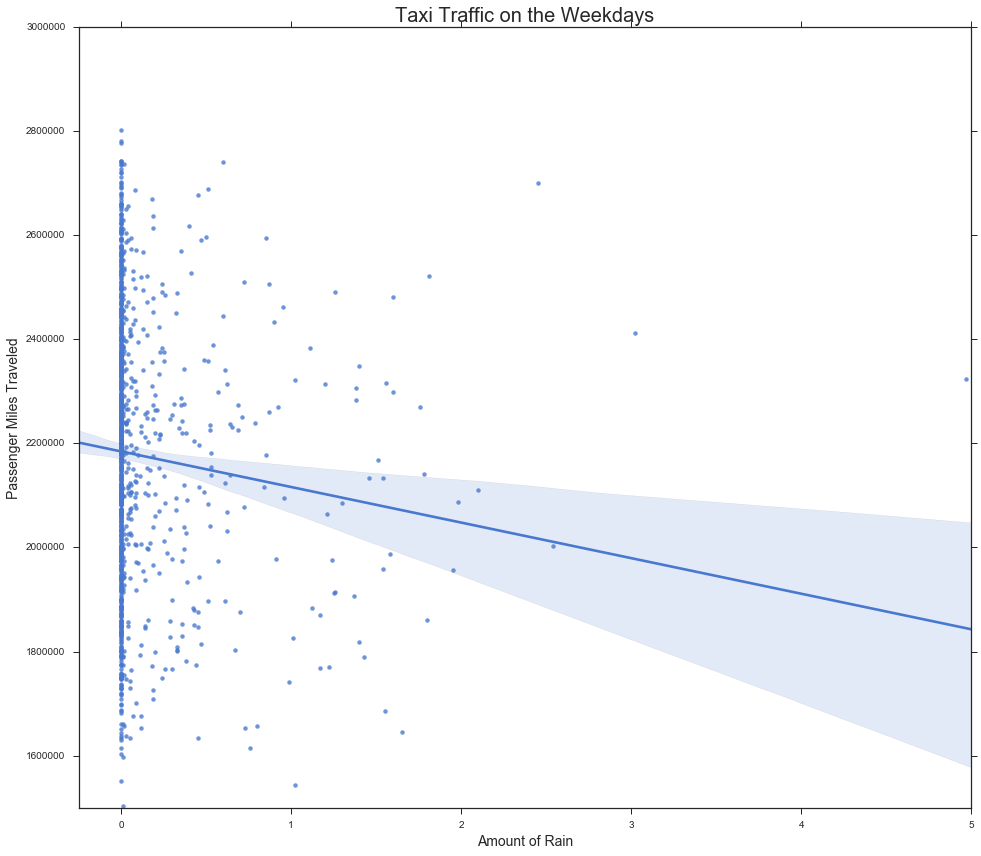

In [310]:
weekends = df[df.weekday<6]
x1 = weekdays.rain
y1 = weekdays.pmt

plt.figure(figsize=(16,14))
sns.set_palette("muted")
sns.set_style("ticks")
sns.regplot(x1, y1, ci=90)
plt.title("Taxi Traffic on the Weekdays", fontsize=20)
plt.xlabel("Amount of Rain", fontsize=14)
plt.ylabel("Passenger Miles Traveled", fontsize=14)
plt.axis([-0.25, 5, 1500000, 3000000])
plt.show()

### When we look only at Sundays, we have about 1/5 as many data points. Therefore, in order to say that passenger miles traveled are decreasing we must reduce the confidence interval to about 40 percent.

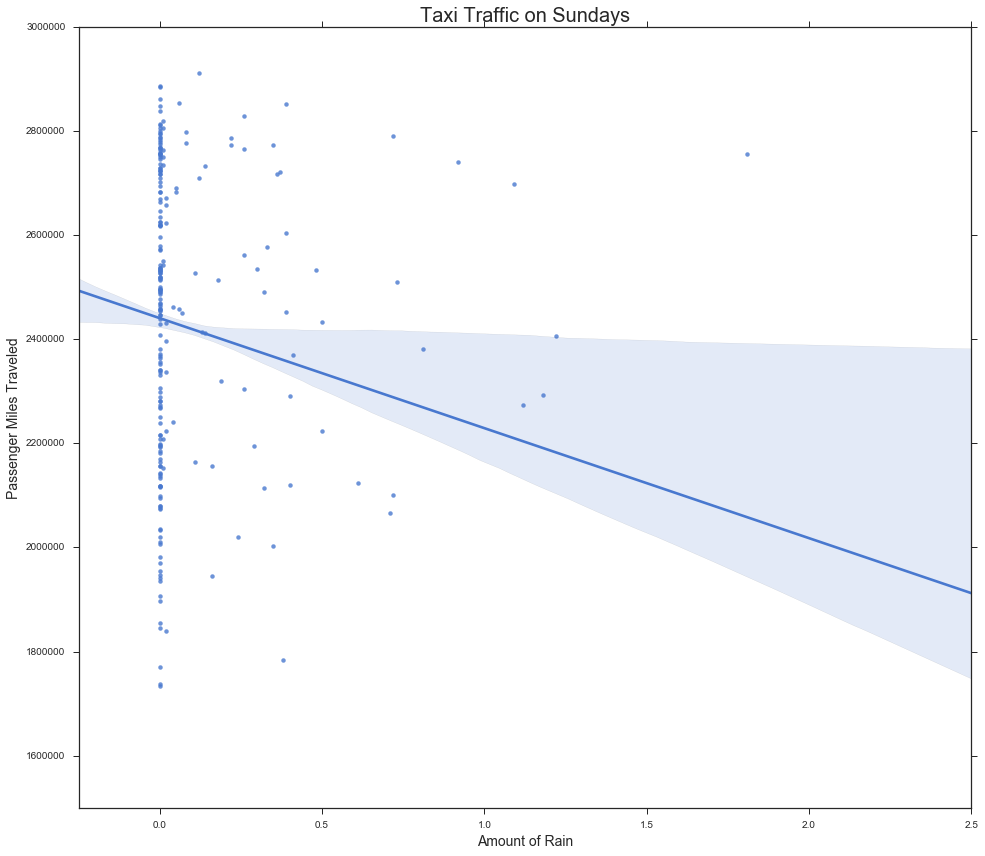

In [305]:
x1 = sundays.rain
y1 = sundays.pmt

plt.figure(figsize=(16,14))
sns.set_palette("muted")
sns.set_style("ticks")
sns.regplot(x1, y1, ci=40)
plt.title("Taxi Traffic on Sundays", fontsize=20)
plt.xlabel("Amount of Rain", fontsize=14)
plt.ylabel("Passenger Miles Traveled", fontsize=14)
plt.axis([-0.25, 2.5, 1500000, 3000000])
plt.show()

### We can try to correct for measurement error or sampling bias by plotting the linear regression for a number of samples after resampling with replacement.

In [290]:
def SamplingDistributions(weekdays, iters=101):
    t = [] 
    for _ in range(iters):
        sample = ts2.ResampleRows(weekdays)
        rain = sample.rain
        pmt = sample.pmt
        estimates = ts2.LeastSquares(rain, pmt)
        t.append(estimates)
    
    inters, slopes = zip(*t)
    return inters, slopes, estimates

def Summarize(estimates, actual=None):
    mean = ts2.Mean(estimates)
    stderr = ts2.Std(estimates, mu=actual)
    cdf = ts2.Cdf(estimates)
    ci = cdf.ConfidenceInterval(90)
    print('Mean: ', mean)
    print('Standard Error: ', stderr)
    print('Confidence Interval: ', ci )

def PlotConfidenceIntervals(xs, inters, slopes, percent=90, **options):
    plt.figure(figsize=(16,14))
    plt.title("90 Percent Confidence for Weekday Taxi Traffic", fontsize=20)
    plt.xlabel("Rain in Inches", fontsize=14)
    plt.ylabel("Passenger Miles Traveled", fontsize=14)
    plt.axis([-0.25, 5, 1250000, 2500000])
    fys_seq = []
    for inter, slope in zip(inters, slopes):
        fxs, fys = ts2.FitLine(xs, inter, slope)
        fys_seq.append(fys)
    
    p = (100-percent) / 2
    percents = p, 100-p
    low, high = ts2.PercentileRows(fys_seq, percents)
    tp.FillBetween(fxs, low, high, **options)
    weekends = df[df.weekday<6]
    x1 = weekdays.rain
    y1 = weekdays.pmt
    fit1 = np.polyfit(x1, y1, deg=1)
    plt.plot(x1, fit1[0] * x1 + fit1[1], color='red')
    tp.Show()

In [255]:
inters, slopes, estimates = SamplingDistributions(weekdays)

In [256]:
Summarize(estimates)

Mean:  1051194.60716
Standard Error:  1128991.6629114593
Confidence Interval:  (-77797.055755303823, 2180186.270067615)


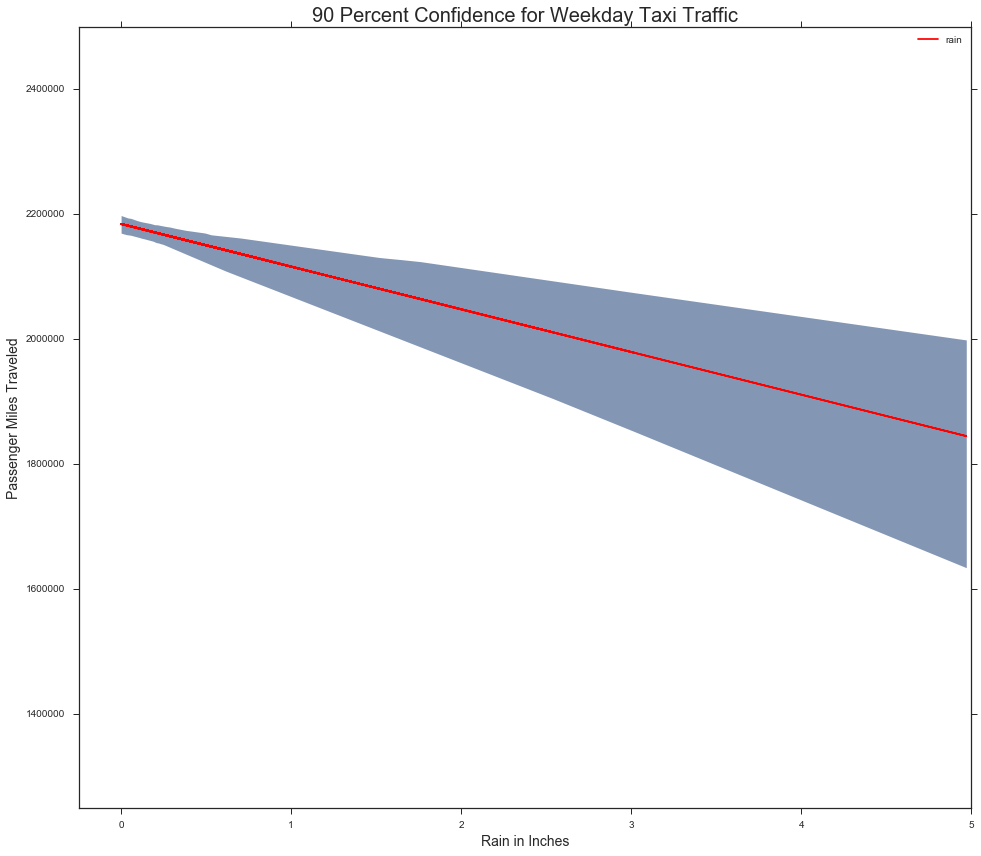

In [291]:
PlotConfidenceIntervals(weekdays.rain, inters, slopes, percent=90)

In [258]:
plt.figure(figsize=(16,14))
rain = df.rain
hist = Histogram(rain, values='rain', title="Rain Histogram", color='blue', bins=30, plot_width=1200)

show(hist)

In [259]:
mta = dataframe[dataframe.entries>0]
len(mta)

952

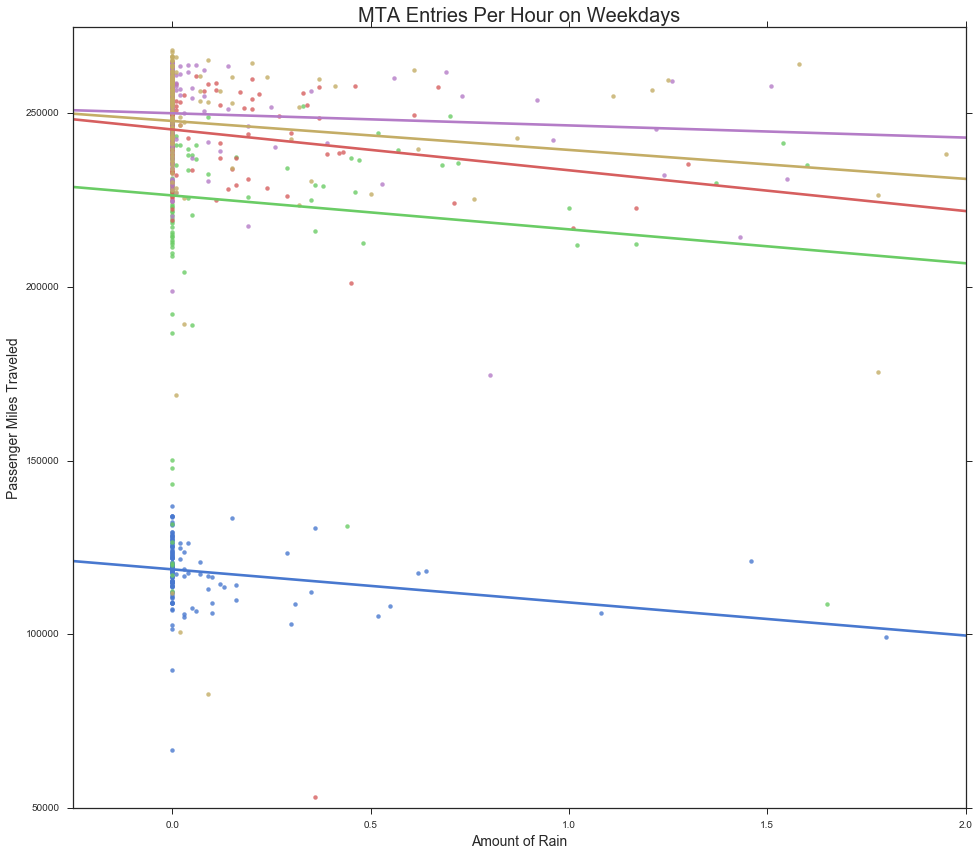

In [329]:
x1 = mta[mta.weekday==1].rain
y1 = mta[mta.weekday==1].entries
x2 = mta[mta.weekday==2].rain
y2 = mta[mta.weekday==2].entries
x3 = mta[mta.weekday==3].rain
y3 = mta[mta.weekday==3].entries
x4 = mta[mta.weekday==4].rain
y4 = mta[mta.weekday==4].entries
x5 = mta[mta.weekday==5].rain
y5 = mta[mta.weekday==5].entries

plt.figure(figsize=(16,14))
sns.set_palette("muted")
sns.set_style("ticks")
sns.regplot(x1, y1, ci=None, label="Mondays")
sns.regplot(x2, y2, ci=None, label="Tuesdays")
sns.regplot(x3, y3, ci=None, label="Wednesdays")
sns.regplot(x4, y4, ci=None, label="Thursdays")
sns.regplot(x5, y5, ci=None, label="Fridays")
plt.title("MTA Entries Per Hour on Weekdays", fontsize=20)
plt.xlabel("Amount of Rain", fontsize=14)
plt.ylabel("Passenger Miles Traveled", fontsize=14)
plt.axis([-0.25, 2, 50000, 275000])
plt.show()

Blue = Mondays, Green = Tuesday, Red = Wednesdays, Purple = Thursdays, Yellow = Friday

### We can check how likely it is that we would end up with such a different mean for traffic on Mondays by chance.

In [331]:
mondays = mta[mta.weekday==1].entries
other_weekdays = mta[(mta.weekend==0)&(mta.weekday!=1)].entries
data = mondays, other_weekdays
ht = DiffMeansPermutate(data)
pvalue = ht.PValue()
difference_in_means = abs(mondays.mean()-other_weekdays.mean())
print(difference_in_means)
print(pvalue)

123488.45768277561
0.0


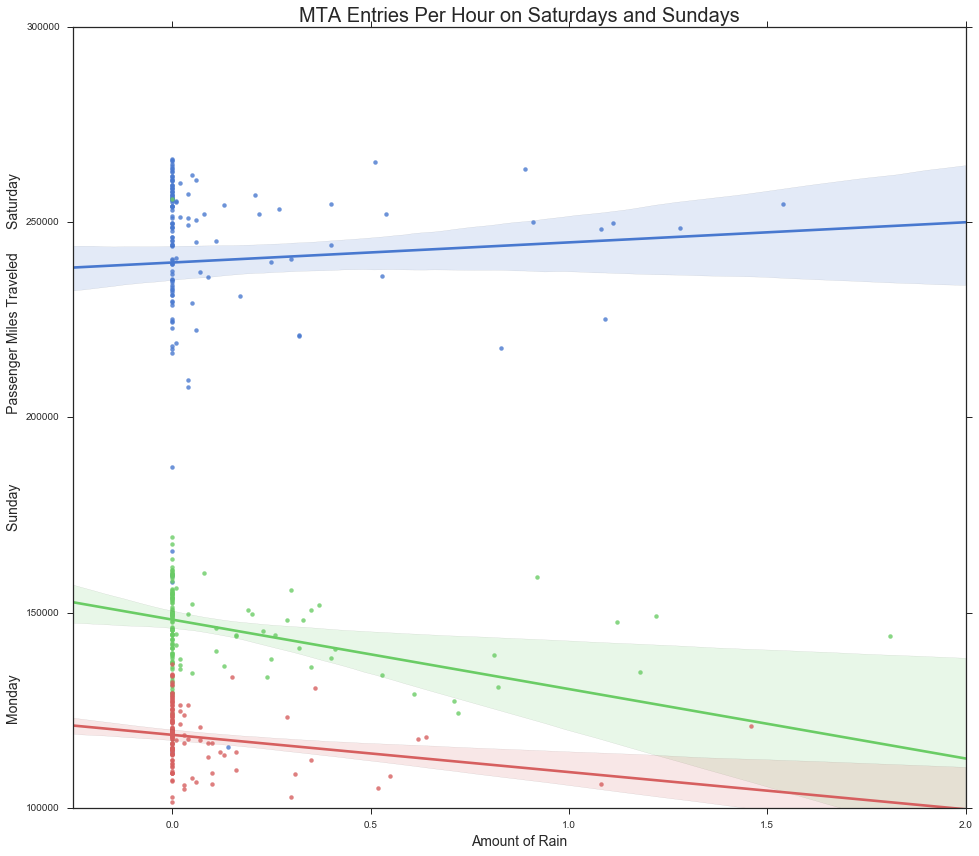

In [339]:
x1 = mta[mta.weekday==6].rain
y1 = mta[mta.weekday==6].entries
x2 = mta[mta.weekday==7].rain
y2 = mta[mta.weekday==7].entries
x3 = mta[mta.weekday==1].rain
y3 = mta[mta.weekday==1].entries

plt.figure(figsize=(16,14))
sns.set_palette("muted")
sns.set_style("ticks")
sns.regplot(x1, y1, ci=90, label="Saturdays")
sns.regplot(x2, y2, ci=90, label="Sundays")
sns.regplot(x3, y3, ci=90, label="Mondays")
plt.title("MTA Entries Per Hour on Saturdays and Sundays", fontsize=20)
plt.xlabel("Amount of Rain", fontsize=14)
plt.ylabel("Monday                                     Sunday                  Passenger Miles Traveled      Saturday                ", fontsize=14)
plt.axis([-0.25, 2, 100000, 300000])
plt.show()

In [261]:
data = y1, y2
ht = DiffMeansPermutate(data)
pvalue = ht.PValue()
difference_in_means = abs(y1.mean()-y2.mean())
print(difference_in_means)
print(pvalue)

94347.67704852947
0.0
